#### The objective of this notebook is to predict blood pressure with age

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### Load and clean the dataset

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Check if data consists of na values.

In [6]:
data.columns[data.isna().any()]

Index([], dtype='object')

#### Extract only the required columns

In [7]:
data_req = data.loc[:,['BloodPressure','Age']]

data_req

#### Plot the dataset to visualise the dataset

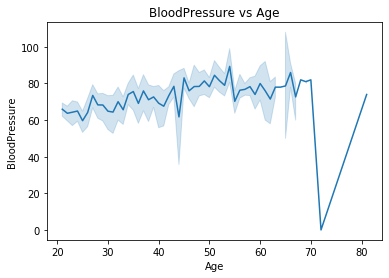

In [8]:
sns.lineplot(y=data_req['BloodPressure'],x=data_req['Age']);
plt.title("BloodPressure vs Age");

#### We want to predict BloodPressure based on Age column

#### So our attribute will be 'Age' (Stored in x variable) and our label will be 'BloodPressure' (stored in y variable)

Reshape your data using array.reshape(-1, 1) if your data has a single feature
Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown 

https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In this case, we have only feature. So our feature vector is a 1-D Array.  
Need to check what happens if we have a multiple features as part of our input data

In [9]:
X = data_req['Age'].values.reshape(-1,1)

#### Verify the number of rows and columns

In [10]:
X.shape

(768, 1)

In [11]:
y = data_req['BloodPressure'].values.reshape(-1,1)

In [12]:
y

array([[ 72],
       [ 66],
       [ 64],
       [ 66],
       [ 40],
       [ 74],
       [ 50],
       [  0],
       [ 70],
       [ 96],
       [ 92],
       [ 74],
       [ 80],
       [ 60],
       [ 72],
       [  0],
       [ 84],
       [ 74],
       [ 30],
       [ 70],
       [ 88],
       [ 84],
       [ 90],
       [ 80],
       [ 94],
       [ 70],
       [ 76],
       [ 66],
       [ 82],
       [ 92],
       [ 75],
       [ 76],
       [ 58],
       [ 92],
       [ 78],
       [ 60],
       [ 76],
       [ 76],
       [ 68],
       [ 72],
       [ 64],
       [ 84],
       [ 92],
       [110],
       [ 64],
       [ 66],
       [ 56],
       [ 70],
       [ 66],
       [  0],
       [ 80],
       [ 50],
       [ 66],
       [ 90],
       [ 66],
       [ 50],
       [ 68],
       [ 88],
       [ 82],
       [ 64],
       [  0],
       [ 72],
       [ 62],
       [ 58],
       [ 66],
       [ 74],
       [ 88],
       [ 92],
       [ 66],
       [ 85],
       [ 66],
      

#### Now we split 80% of our data as Train and 20% of our data as Test

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Verify that the data has actually been split

In [14]:
X_train.shape

(614, 1)

#### Let's train our model

In [15]:
reg = LinearRegression()

In [16]:
# Training the algorithm based on training data
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data

In [17]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

[56.67889937]
[[0.37349861]]


#### Let's predict for our test data based on trained model

In [18]:
y_pred = reg.predict(X_test)

In [19]:
y_pred

array([[64.89586874],
       [65.26936735],
       [66.01636457],
       [75.72732838],
       [68.25735622],
       [65.64286596],
       [69.00435343],
       [76.10082699],
       [66.01636457],
       [77.22132281],
       [67.13686039],
       [76.47432559],
       [77.96832003],
       [66.01636457],
       [72.36584091],
       [68.63085483],
       [70.12484926],
       [64.52237014],
       [80.20931167],
       [67.88385761],
       [70.49834787],
       [64.52237014],
       [66.01636457],
       [73.85983534],
       [64.89586874],
       [64.52237014],
       [66.76336178],
       [71.24534508],
       [65.64286596],
       [67.88385761],
       [75.72732838],
       [64.52237014],
       [66.76336178],
       [67.13686039],
       [65.64286596],
       [71.9923423 ],
       [72.36584091],
       [64.52237014],
       [66.01636457],
       [66.38986318],
       [65.26936735],
       [64.52237014],
       [68.63085483],
       [66.01636457],
       [76.47432559],
       [64

#### Let's compare the actual values of y taken from the initial dataset (y_test) vs the predicted values(y_pred)

In [20]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

In [21]:
df

,Actual,Predicted
0,76,64.895869
1,74,65.269367
2,62,66.016365
3,72,75.727328
4,65,68.257356
...,...,...
149,80,67.510359
150,58,67.136860
151,86,64.895869
152,74,65.642866


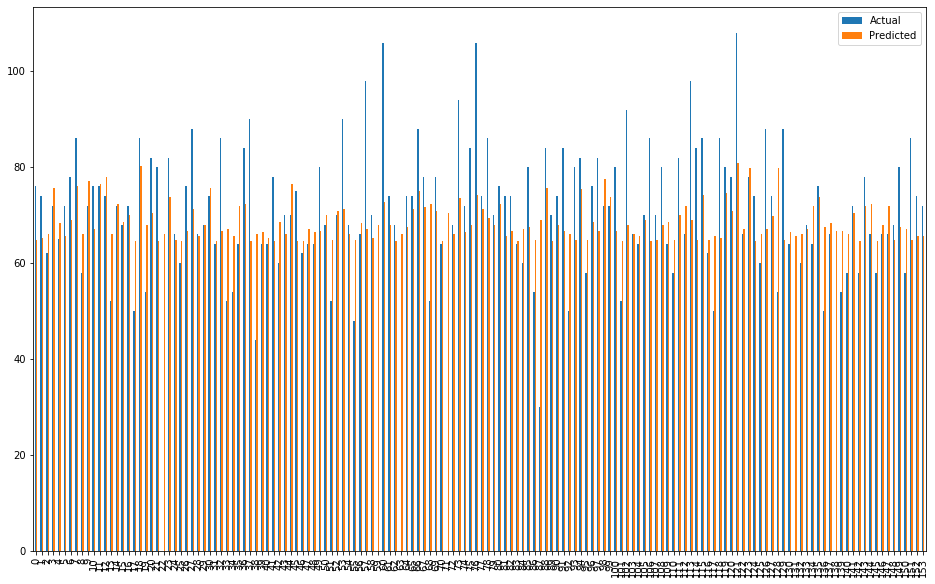

In [22]:
df.plot(kind='bar',figsize=(16,10))

#### Lets plot the reg line

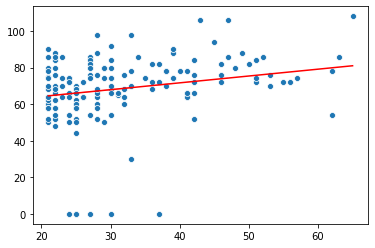

In [23]:
sns.scatterplot(X_test.flatten(),y_test.flatten())
sns.lineplot(X_test.flatten(),y_pred.flatten(),color='r');